In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from scipy import stats

np.set_printoptions(precision=4,suppress=True)

%matplotlib inline
import seaborn as sns

In [2]:
## Generating some fake data to understand feature scaling predictions are better than without feature scaling

train=pd.DataFrame({'id':[0,1,2],'length':[0.9,0.3,0.6],'mass':[0.1,0.2,0.8],'rings':[40,50,60]})
test=pd.DataFrame({'length':[0.59],'mass':[0.79],'rings':[54.9]})

In [3]:
## Prediction of ID from test data without any feature scaling

feature_cols=['length','mass','rings']
X = train[feature_cols]
y= train.id

## Using K-nearest neighbours algorithm to compute the Linear regression model
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(X,y)

print("Training data :\n",train,"\n")
print("Test data sample :\n",test)

print("Prediction of test data ID is ",knn.predict(test))  ## Prediction is 1 instead of 2 because the proportion
                                                        ## difference is very large wrt rings attribute
    

Training data :
    id  length  mass  rings
0   0     0.9   0.1     40
1   1     0.3   0.2     50
2   2     0.6   0.8     60 

Test data sample :
    length  mass  rings
0    0.59  0.79   54.9
Prediction of test data ID is  [1]


In [4]:
### FEATURE SCALING OF DATA - STANDARD SCALING (Using Z-score (value-mean/stddev))

from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaler.fit(X)
X_scaled=scaler.transform(X)

print("Original values is \n",X.values,"\n")
print("Scaled values are \n",X_scaled)

# figure out how the standardization worked
print("Mean of each columns \n",scaler.mean_,"\n")
print("Standard deviation of each columns \n",scaler.scale_,"\n")
print("Manual Z-score is \n ",(X.values - scaler.mean_)/scaler.scale_)
print("Final Means of Scaled data \n",X_scaled.mean(axis=0))
print("Final Std Dev of Scaled data \n",X_scaled.std(axis=0))

Original values is 
 [[ 0.9  0.1 40. ]
 [ 0.3  0.2 50. ]
 [ 0.6  0.8 60. ]] 

Scaled values are 
 [[ 1.2247 -0.8627 -1.2247]
 [-1.2247 -0.5392  0.    ]
 [ 0.      1.4018  1.2247]]
Mean of each columns 
 [ 0.6     0.3667 50.    ] 

Standard deviation of each columns 
 [0.2449 0.3091 8.165 ] 

Manual Z-score is 
  [[ 1.2247 -0.8627 -1.2247]
 [-1.2247 -0.5392  0.    ]
 [ 0.      1.4018  1.2247]]
Final Means of Scaled data 
 [ 0. -0.  0.]
Final Std Dev of Scaled data 
 [1. 1. 1.]


In [5]:
### FEATURE SCALING OF DATA - MINMAX SCALING
from sklearn.preprocessing import MinMaxScaler

minmax=MinMaxScaler()

minmax.fit(X)
X_scaled_minmax = minmax.transform(X)

print("Original values are \n",X.values)
print("Min Max scaled values are \n",X_scaled_minmax)

print("Min and Max of scaled values are  \n",X_scaled_minmax.min(),X_scaled_minmax.max())
print("Mean of min/max columns are \n",X_scaled_minmax.mean(axis=0))
print("Std dev of min/max columns are \n",X_scaled_minmax.std(axis=0))

Original values are 
 [[ 0.9  0.1 40. ]
 [ 0.3  0.2 50. ]
 [ 0.6  0.8 60. ]]
Min Max scaled values are 
 [[1.     0.     0.    ]
 [0.     0.1429 0.5   ]
 [0.5    1.     1.    ]]
Min and Max of scaled values are  
 0.0 1.0
Mean of min/max columns are 
 [0.5   0.381 0.5  ]
Std dev of min/max columns are 
 [0.4082 0.4416 0.4082]


In [6]:
## Generating prediction for Feature standard scaled data

from sklearn.neighbors import KNeighborsClassifier
knn1=KNeighborsClassifier(n_neighbors=1)
knn1.fit(X_scaled,y)

print("Standard Scaled data prediction is ",knn.predict(test))

Standard Scaled data prediction is  [1]


In [7]:
## Generating prediction for Feature MinMax scaled data


from sklearn.neighbors import KNeighborsClassifier
knn2=KNeighborsClassifier(n_neighbors=1)
knn2.fit(X_scaled_minmax,y)

print("Standard Scaled data prediction is ",knn.predict(test))

Standard Scaled data prediction is  [1]


# WINE DATASET ANALYSIS OF FEATURE DATA SCALING

In [8]:
## Applying Scaling on Wine Dataset
winedata=pd.read_csv('C:/Users/Madhumita.Ganesan/Desktop/DataScience/data/wine.data',names=['label','alcohol','Malic_acid','ash','Alkalinity','Magnesium','Tot_Phenols','Flavonoids','NonFlavPhenols','Proanth','Color','Hue','OD','Proline'])

In [9]:
## Generating the train/ test data

X_w=winedata[winedata.columns[1:]].astype(float)
y_w=winedata.label

X_w_train,X_w_test,y_w_train,y_w_test=train_test_split(X_w,y_w,test_size=0.2,random_state=1)

In [10]:
## Using the KKN algorithm
from sklearn.neighbors import KNeighborsClassifier
knn_w=KNeighborsClassifier(n_neighbors=3)
knn_w.fit(X_w_train,y_w_train)

print("Predicted label is \n",knn_w.predict(X_w_test))
print("Actual Label is \n",y_w_test.values)

knn_w_pred=knn_w.predict(X_w_test)

Predicted label is 
 [1 2 3 1 1 2 3 1 3 2 1 3 2 1 3 2 2 1 2 1 1 2 3 1 1 3 1 1 1 2 2 2 2 1 3 2]
Actual Label is 
 [3 2 1 2 1 3 2 1 3 2 1 1 2 1 2 2 3 1 2 1 1 2 3 2 1 3 1 1 1 3 2 3 3 1 2 2]


In [11]:
pd.Series(knn_w.predict(X_w_test)).value_counts()

1    15
2    13
3     8
dtype: int64

In [12]:
pd.Series(y_w_test).value_counts()

1    14
2    13
3     9
Name: label, dtype: int64

In [13]:
print("Model accuracy is \n: ",metrics.accuracy_score(y_w_test,knn_w_pred))

Model accuracy is 
:  0.6388888888888888


In [14]:
## Standard Scaling of Wine data and computing the KNN algorithm
from sklearn.preprocessing import StandardScaler
scaler_w=StandardScaler()
scaler_w.fit(X_w)
X_scaled_1=scaler_w.transform(X_w)

X_train1,X_test1,y_train1,y_test1 = train_test_split(X_scaled_1,y_w,test_size=0.2,random_state=1)

knn_w_ss=KNeighborsClassifier(n_neighbors=3)
knn_w_ss.fit(X_train1,y_train1)

print("Standard Scaled data prediction is ",knn_w_ss.predict(X_test1))

knn_w_ss_pred=knn_w_ss.predict(X_test1)

print("Model accuracy is \n",metrics.accuracy_score(y_test1,knn_w_ss_pred))

Standard Scaled data prediction is  [3 2 1 2 1 3 2 1 3 2 1 1 2 1 2 2 3 1 2 1 1 2 3 1 1 3 1 1 1 3 2 3 3 1 2 2]
Model accuracy is 
 0.9722222222222222


In [15]:
## MinMax Scaling of Wine data and computing the KNN algorithm

from sklearn.preprocessing import MinMaxScaler
scaler_wm=MinMaxScaler()
scaler_wm.fit(X_w)
X_scaled_2=scaler_wm.transform(X_w)

X_train2,X_test2,y_train2,y_test2 = train_test_split(X_scaled_2,y_w,test_size=0.2,random_state=1234)

knn_w_mm=KNeighborsClassifier(n_neighbors=3)
knn_w_mm.fit(X_train2,y_train2)

print("Standard Scaled data prediction is ",knn_w_mm.predict(X_test2))

knn_w_mm_pred=knn_w_mm.predict(X_test2)

print("Model accuracy is \n",metrics.accuracy_score(y_test2,knn_w_mm_pred))

Standard Scaled data prediction is  [2 1 2 2 3 2 3 1 1 3 3 2 1 2 2 1 1 3 3 3 1 2 2 3 2 3 1 1 1 2 1 3 2 2 2 2]
Model accuracy is 
 0.9444444444444444


# HANDLING SKEWNESS

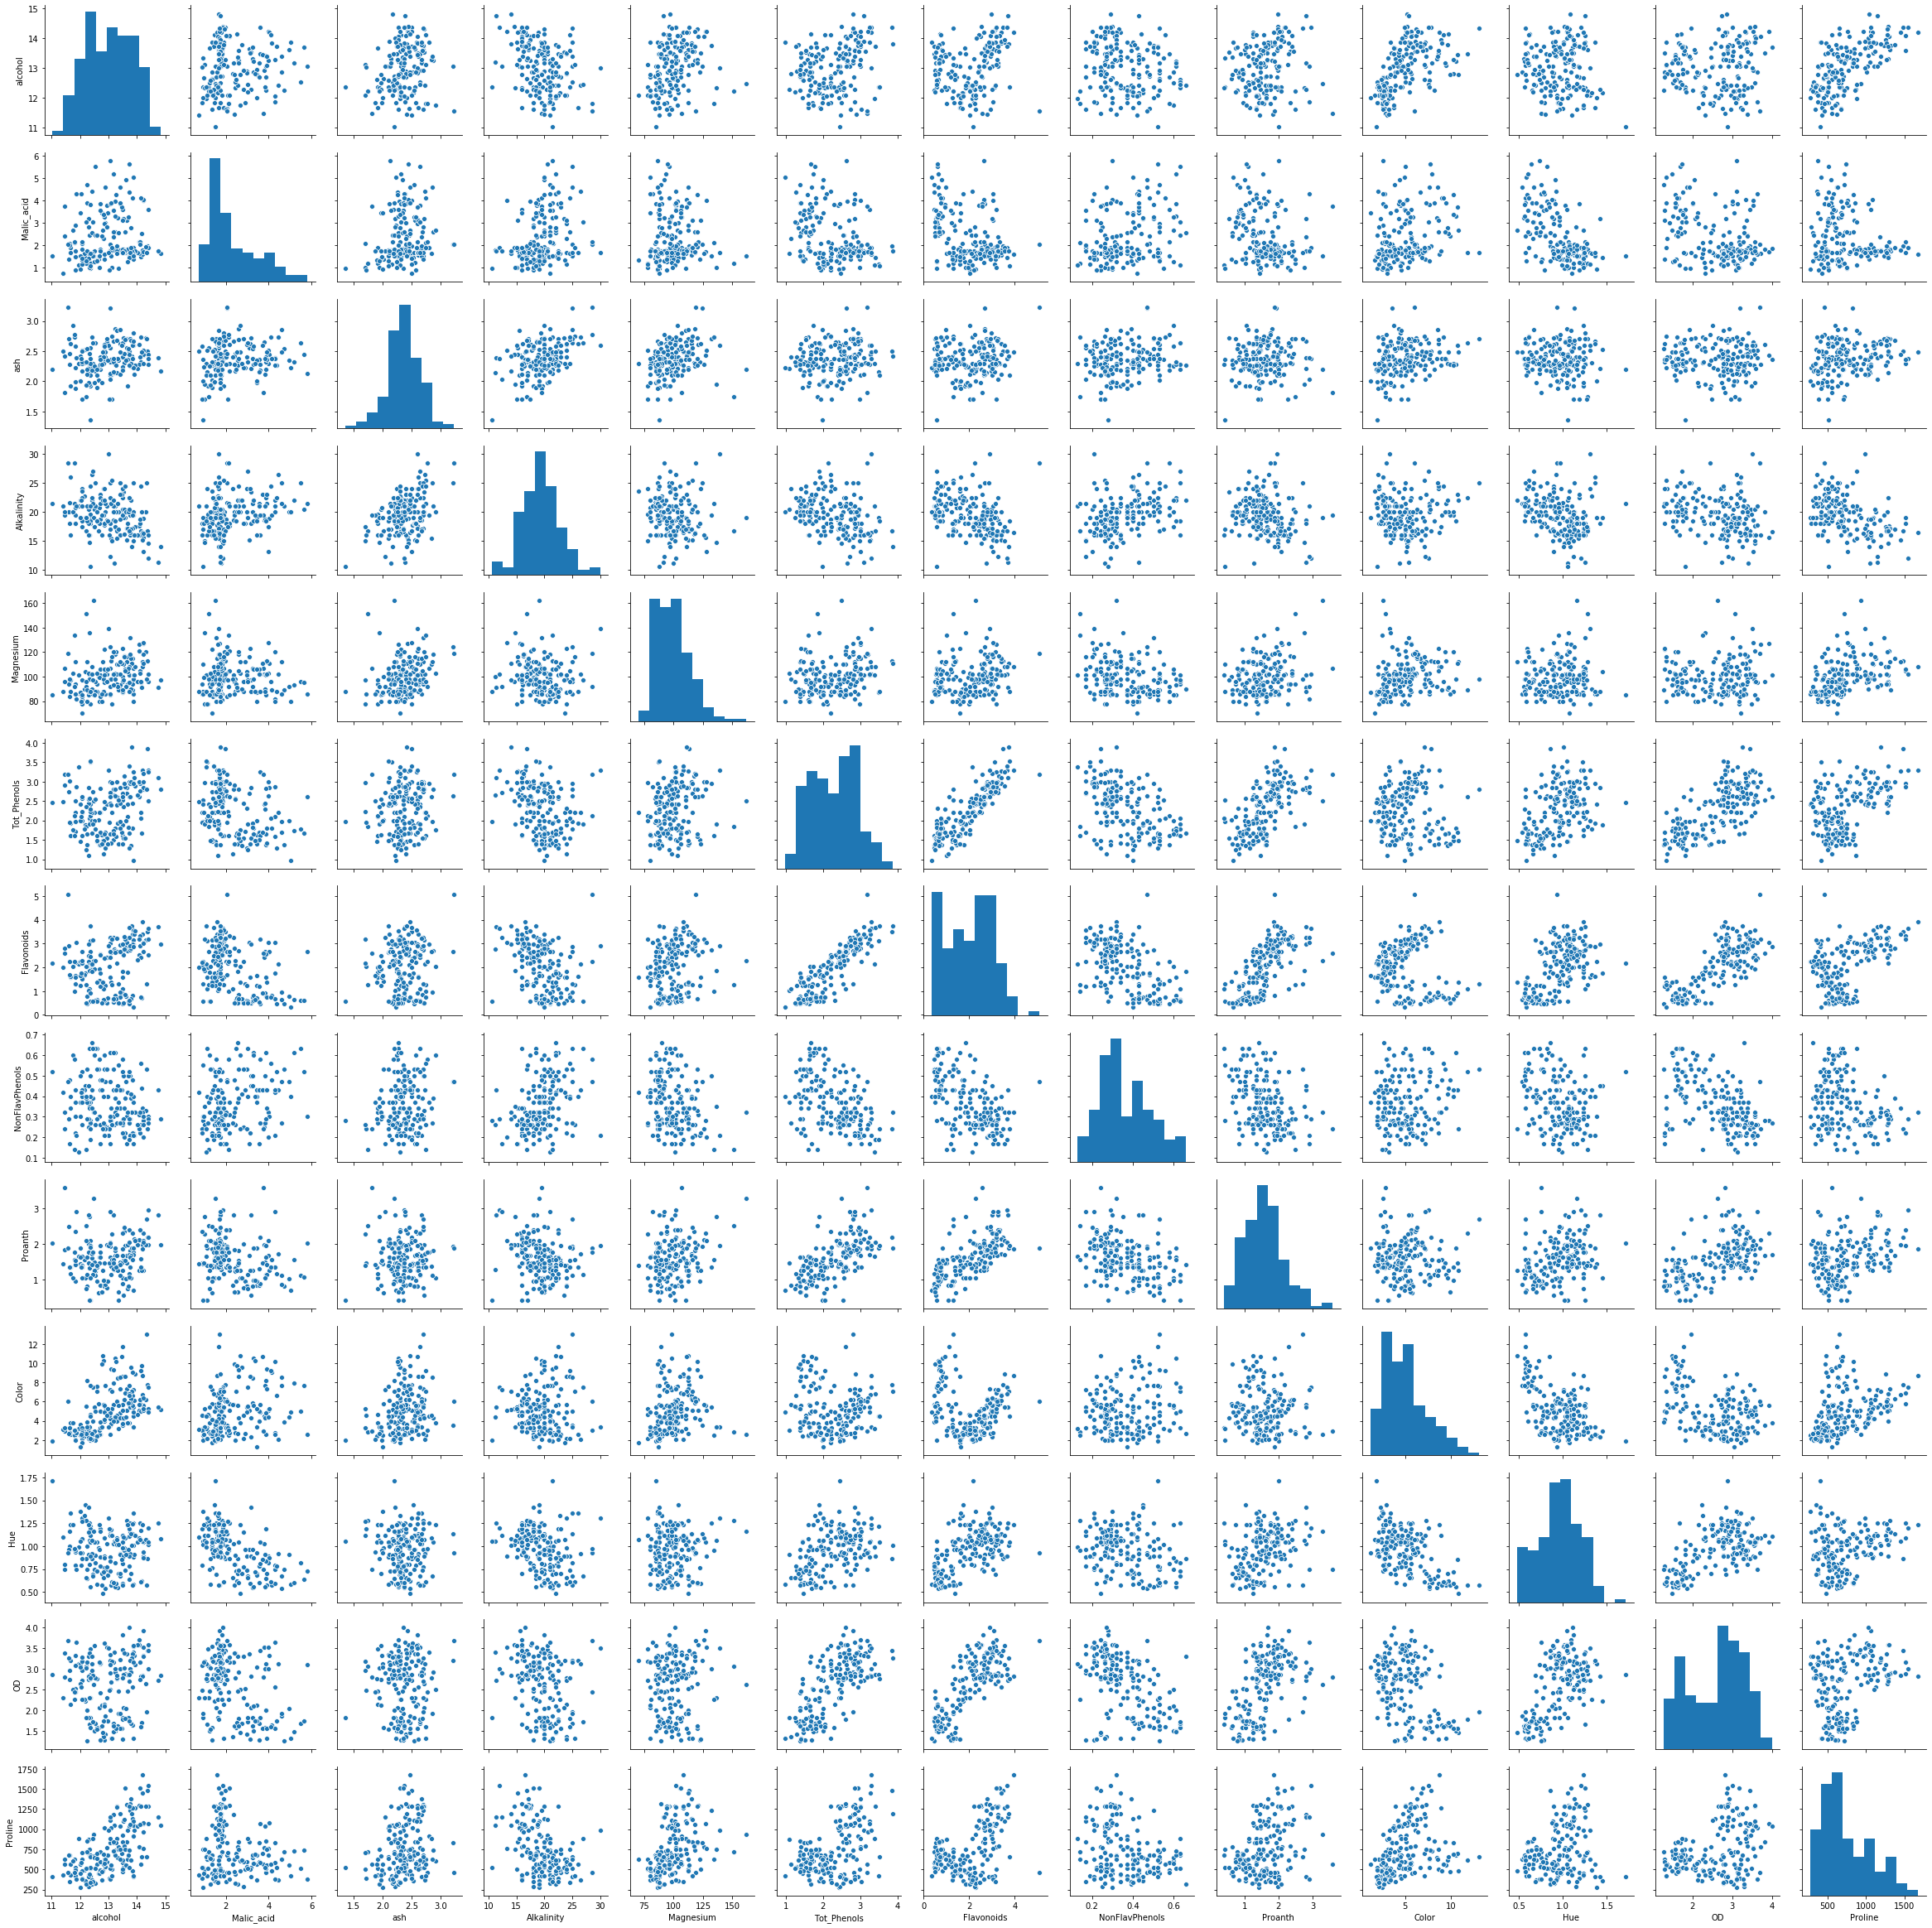

In [16]:
X_w=winedata[winedata.columns[1:]].astype(float)
sns.pairplot(X_w)

In [17]:
winedata.columns

Index(['label', 'alcohol', 'Malic_acid', 'ash', 'Alkalinity', 'Magnesium',
       'Tot_Phenols', 'Flavonoids', 'NonFlavPhenols', 'Proanth', 'Color',
       'Hue', 'OD', 'Proline'],
      dtype='object')

Text(0, 0.5, 'Frequency')

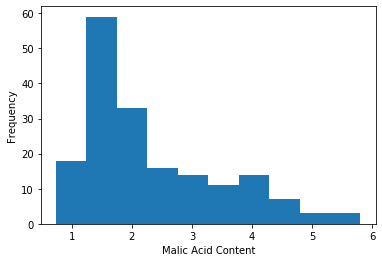

In [18]:
sns.mpl.pyplot.hist(winedata.Malic_acid)
sns.mpl.pyplot.xlabel("Malic Acid Content")
sns.mpl.pyplot.ylabel("Frequency")

In [19]:
malic_skews=stats.skew(winedata.Malic_acid)
print("Skew in original data is \n: ",malic_skews)  ## Positive value is right skewed

Skew in original data is 
:  1.0308694978039965


In [20]:
## Types of transformations to reduce skewness in data
## Squareroot transformation
## Logrithmic Transformation
## Box-Cox transformation

sqrt_malic=np.sqrt(winedata.Malic_acid)
log_malic=np.log(winedata.Malic_acid)
boxcox_malic,power_val=stats.boxcox(winedata.Malic_acid)

In [21]:
print("Found lambda :",power_val)
print("Box cox transformed data :",boxcox_malic)

Found lambda : -0.2777553299119975
Box cox transformed data : [ 0.4984  0.5328  0.7639  0.6095  0.8363  0.5232  0.5745  0.6896  0.4622
  0.2879  0.6933  0.3715  0.5084  0.5084  0.5745  0.547   0.5966  0.424
  0.4351  0.9709  0.4569  1.1154  0.57    0.4406  0.547   0.6508  0.528
  0.5035  0.5879  0.4831  0.3835  0.4728  0.5563  0.4011  0.5423  0.547
  0.4622  0.4675  0.3835  1.1489  0.4984  1.1227  0.5835  1.1472  0.528
  1.1574  1.0759  0.4831  0.6387  0.5084  0.5084  0.4675  0.5183  0.5879
  0.478   0.5084  0.4934  0.618   0.3405 -0.0624  0.0941  0.2947  0.2164
  0.1202  0.353   0.1857  0.0099  0.1536 -0.0624  0.1698  0.4461  0.3894
  0.4728  0.478   0.0852  0.579  -0.1069  0.9191 -0.0101  1.128  -0.0844
  0.547   0.1202  1.1262 -0.1184 -0.0203  0.4461  0.478   0.6548  0.2742
  0.5563  0.3894  0.4011  0.9035  0.6264  0.3953  0.6782  0.3277  0.067
  0.9871  0.6627  0.2811  0.7933  0.5035  0.5084  0.8243  0.5084  0.5183
  0.2458  0.2879  1.1044  0.7869  0.8624 -0.3141  0.3147  0.3894  0

Text(0, 0.5, 'Normalized Frequency')

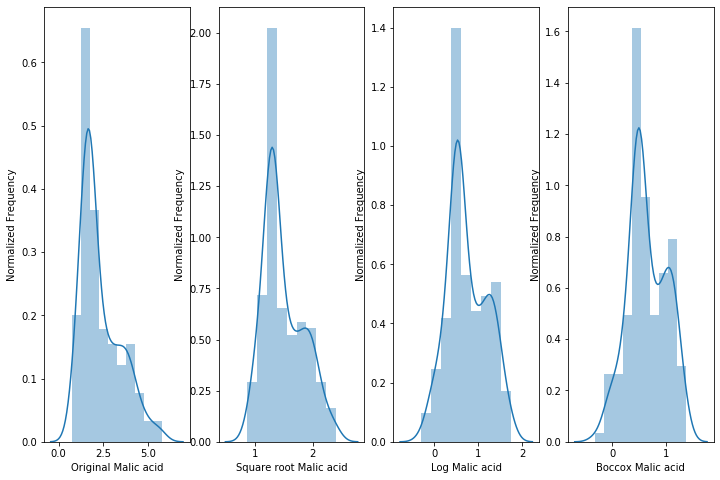

In [22]:
#Creating a big figure
figure=sns.mpl.pyplot.figure(figsize=(12,8))
## Creating 4 subplots
figure.add_subplot(141)
sns.distplot(winedata.Malic_acid)
sns.mpl.pyplot.xlabel("Original Malic acid")
sns.mpl.pyplot.ylabel("Normalized Frequency")

figure.add_subplot(142)
sns.distplot(sqrt_malic)
sns.mpl.pyplot.xlabel("Square root Malic acid")
sns.mpl.pyplot.ylabel("Normalized Frequency")

figure.add_subplot(143)
sns.distplot(log_malic)
sns.mpl.pyplot.xlabel("Log Malic acid")
sns.mpl.pyplot.ylabel("Normalized Frequency")

figure.add_subplot(144)
sns.distplot(boxcox_malic)
sns.mpl.pyplot.xlabel("Boccox Malic acid")
sns.mpl.pyplot.ylabel("Normalized Frequency")

In [23]:
all_skews=map(stats.skew,[winedata.Malic_acid,sqrt_malic,log_malic,boxcox_malic])
list(zip(["Original","Sqrt","Log","box-cox"],all_skews))

[('Original', 1.0308694978039965),
 ('Sqrt', 0.6685620899904606),
 ('Log', 0.2722937529081863),
 ('box-cox', 0.026826802608560164)]

# HANDLING CATEGORICAL VARIABLES

In [24]:
columns=["sex","length","diam","height","whole","shucked","viscera","shell","age"]
abalone_data = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data",names=columns)
abalone_data.head()

,sex,length,diam,height,whole,shucked,viscera,shell,age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [25]:
## Sex is the categorical variable which has to be transformed to numeric value
sex_dummies=pd.get_dummies(abalone_data.sex).astype(int)
sex_dummies.head()

,F,I,M
0,0,0,1
1,0,0,1
2,1,0,0
3,0,0,1
4,0,1,0


In [26]:
#sex_dummies= sex_dummies[["F","I"]]
#sex_dummies.head()

#
Here is how we interpret the encoding:

F is encoded as F=1 and I=0
I is encoded as F=0 and I=1
M is encoded as F=0 and I=0

In [27]:
abalone_data=pd.concat([abalone_data,sex_dummies],axis=1)  ## adding columns to the dataframe
abalone_data.drop("sex",inplace=True,axis=1)
abalone_data.head()

,length,diam,height,whole,shucked,viscera,shell,age,F,I,M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0,1,0


In [28]:
### HANDLING MISSING VALUES
kidney_columns = ["age","bp","sg","al","su","rbc","pc","pcc","ba","bgr","bu","sc","sod","pot","hemo","pcv","wc","rc","htn","dm","cad","appet","pe","ane","class"]
kidney_data = pd.read_csv("../data/chronic_kidney_disease.csv", header=None,names=kidney_columns)
kidney_data.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,class
0,48,80,1.020,1,0,?,normal,notpresent,notpresent,121,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7,50,1.020,4,0,?,normal,notpresent,notpresent,?,...,38,6000,?,no,no,no,good,no,no,ckd
2,62,80,1.010,2,3,normal,normal,notpresent,notpresent,423,...,31,7500,?,no,yes,no,poor,no,yes,ckd
3,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51,80,1.010,2,0,normal,normal,notpresent,notpresent,106,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [29]:
kidney_data=pd.read_csv("../data/chronic_kidney_disease.csv",header=None,na_values="?",names=kidney_columns)

In [30]:
kidney_data.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


In [31]:
kidney_data.isnull().head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,class
0,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,True,False,False,False,True,...,False,False,True,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [32]:
kidney_data.isnull().sum()

age        9
bp        12
sg        47
al        46
su        49
rbc      152
pc        65
pcc        4
ba         4
bgr       44
bu        19
sc        17
sod       87
pot       88
hemo      52
pcv       71
wc       106
rc       131
htn        2
dm         2
cad        2
appet      1
pe         1
ane        1
class      0
dtype: int64

In [33]:
kidney_data.dtypes

age      float64
bp       float64
sg       float64
al       float64
su       float64
rbc       object
pc        object
pcc       object
ba        object
bgr      float64
bu       float64
sc       float64
sod      float64
pot      float64
hemo     float64
pcv      float64
wc       float64
rc       float64
htn       object
dm        object
cad       object
appet     object
pe        object
ane       object
class     object
dtype: object

In [34]:
## Rearranging the columns to be of the same datatype in order
print("Kidney data columns order before rearranging is : \n",kidney_columns)
kidney_columns=kidney_columns[:5]+kidney_columns[9:18]+kidney_columns[5:9]+kidney_columns[18:]
print("Kidney data columns after rearranging is : \n",kidney_columns)

Kidney data columns order before rearranging is : 
 ['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'class']
Kidney data columns after rearranging is : 
 ['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'class']


In [35]:
kidney_data=kidney_data[kidney_columns]
target=kidney_data["class"]

In [36]:
kidney_data.dtypes

age      float64
bp       float64
sg       float64
al       float64
su       float64
bgr      float64
bu       float64
sc       float64
sod      float64
pot      float64
hemo     float64
pcv      float64
wc       float64
rc       float64
rbc       object
pc        object
pcc       object
ba        object
htn       object
dm        object
cad       object
appet     object
pe        object
ane       object
class     object
dtype: object

In [37]:
##Trying to drop all the NULL values
kidney_data_not_null = kidney_data.dropna()
print("Fraction of data kept : ",kidney_data_not_null.shape[0]/kidney_data.shape[0])

##Almost 60 percent of the data is lost, which will not help in making any predictions
## This can be handled by Data Imputation

## DATA IMPUTATION - CATEGORICAL VARIABLES

##1) Fill in the most common categorical data
##2) Fill in with a special "missing" category

Fraction of data kept :  0.395


In [38]:
kidney_data.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo',
       'pcv', 'wc', 'rc', 'rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'class'],
      dtype='object')

In [39]:
def getmostfreqvalue(my_column):
    return my_column.value_counts().index[0]

most_freq_values_per_column = kidney_data[kidney_columns[14:-1]].apply(getmostfreqvalue,axis=0)
print("Most frequent values in each columns is : \n",most_freq_values_per_column)

Most frequent values in each columns is : 
 rbc          normal
pc           normal
pcc      notpresent
ba       notpresent
htn              no
dm               no
cad              no
appet          good
pe               no
ane              no
dtype: object


In [40]:
categorical_most_frequent = kidney_data[kidney_columns[14:-1]].fillna(most_freq_values_per_column,axis=0)
categorical_most_frequent.head()

,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane
0,normal,normal,notpresent,notpresent,yes,yes,no,good,no,no
1,normal,normal,notpresent,notpresent,no,no,no,good,no,no
2,normal,normal,notpresent,notpresent,no,yes,no,poor,no,yes
3,normal,abnormal,present,notpresent,yes,no,no,poor,yes,yes
4,normal,normal,notpresent,notpresent,no,no,no,good,no,no


In [41]:
spl_missing_category = kidney_data[kidney_columns[14:-1]].fillna("missing")
spl_missing_category.head()

,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane
0,missing,normal,notpresent,notpresent,yes,yes,no,good,no,no
1,missing,normal,notpresent,notpresent,no,no,no,good,no,no
2,normal,normal,notpresent,notpresent,no,yes,no,poor,no,yes
3,normal,abnormal,present,notpresent,yes,no,no,poor,yes,yes
4,normal,normal,notpresent,notpresent,no,no,no,good,no,no


In [42]:
kidney_data[kidney_columns[14:-1]].head()

,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane
0,NaN,normal,notpresent,notpresent,yes,yes,no,good,no,no
1,NaN,normal,notpresent,notpresent,no,no,no,good,no,no
2,normal,normal,notpresent,notpresent,no,yes,no,poor,no,yes
3,normal,abnormal,present,notpresent,yes,no,no,poor,yes,yes
4,normal,normal,notpresent,notpresent,no,no,no,good,no,no


In [43]:
type(most_freq_values_per_column)

pandas.core.series.Series

In [44]:
## DATA IMPUTATION - NUMERIC VALUES

## 1) Fill in using mean
## 2) Fill in using median (when many outliers are present)
## 3) Fill in using default value , like 0

In [45]:
print("Missing numeric values are : ",kidney_data[:14].head())
mean_per_col = kidney_data[kidney_columns[:14]].apply(lambda x: x.mean(),axis=0)

Missing numeric values are :      age    bp     sg   al   su    bgr    bu   sc    sod  pot  ...        pc  \
0  48.0  80.0  1.020  1.0  0.0  121.0  36.0  1.2    NaN  NaN  ...    normal   
1   7.0  50.0  1.020  4.0  0.0    NaN  18.0  0.8    NaN  NaN  ...    normal   
2  62.0  80.0  1.010  2.0  3.0  423.0  53.0  1.8    NaN  NaN  ...    normal   
3  48.0  70.0  1.005  4.0  0.0  117.0  56.0  3.8  111.0  2.5  ...  abnormal   
4  51.0  80.0  1.010  2.0  0.0  106.0  26.0  1.4    NaN  NaN  ...    normal   

          pcc          ba  htn   dm cad appet   pe  ane class  
0  notpresent  notpresent  yes  yes  no  good   no   no   ckd  
1  notpresent  notpresent   no   no  no  good   no   no   ckd  
2  notpresent  notpresent   no  yes  no  poor   no  yes   ckd  
3     present  notpresent  yes   no  no  poor  yes  yes   ckd  
4  notpresent  notpresent   no   no  no  good   no   no   ckd  

[5 rows x 25 columns]


In [46]:
num_mean_filled = kidney_data[kidney_columns[:14]].fillna(mean_per_col,axis=0)

In [47]:
num_mean_filled.head()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc
0,48.0,80.0,1.020,1.0,0.0,121.000000,36.0,1.2,137.528754,4.627244,15.4,44.0,7800.0,5.200000
1,7.0,50.0,1.020,4.0,0.0,148.036517,18.0,0.8,137.528754,4.627244,11.3,38.0,6000.0,4.707435
2,62.0,80.0,1.010,2.0,3.0,423.000000,53.0,1.8,137.528754,4.627244,9.6,31.0,7500.0,4.707435
3,48.0,70.0,1.005,4.0,0.0,117.000000,56.0,3.8,111.000000,2.500000,11.2,32.0,6700.0,3.900000
4,51.0,80.0,1.010,2.0,0.0,106.000000,26.0,1.4,137.528754,4.627244,11.6,35.0,7300.0,4.600000


In [48]:
median_per_col = kidney_data[kidney_columns[:14]].apply(lambda x:x.median(),axis=0)

num_median_filled = kidney_data[kidney_columns[:14]].fillna(median_per_col)
num_median_filled.head()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc
0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,138.0,4.4,15.4,44.0,7800.0,5.2
1,7.0,50.0,1.020,4.0,0.0,121.0,18.0,0.8,138.0,4.4,11.3,38.0,6000.0,4.8
2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,1.8,138.0,4.4,9.6,31.0,7500.0,4.8
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9
4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,1.4,138.0,4.4,11.6,35.0,7300.0,4.6


In [49]:
def_per_column = kidney_data[kidney_columns[:14]].fillna(0.0)
def_per_column.head()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc
0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,0.0,0.0,15.4,44.0,7800.0,5.2
1,7.0,50.0,1.020,4.0,0.0,0.0,18.0,0.8,0.0,0.0,11.3,38.0,6000.0,0.0
2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,1.8,0.0,0.0,9.6,31.0,7500.0,0.0
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9
4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,1.4,0.0,0.0,11.6,35.0,7300.0,4.6


# Exercise Problem Project

##NUmeric columns Missing Values Transformation

In [50]:
mean_per_column=kidney_data[kidney_columns[:14]].apply(lambda x: x.mean(),axis=0)
mean_fill = kidney_data[kidney_columns[:14]].fillna(mean_per_column)

kidney_data[kidney_columns[:14]].head()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc
0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,NaN,NaN,15.4,44.0,7800.0,5.2
1,7.0,50.0,1.020,4.0,0.0,NaN,18.0,0.8,NaN,NaN,11.3,38.0,6000.0,NaN
2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,1.8,NaN,NaN,9.6,31.0,7500.0,NaN
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9
4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,1.4,NaN,NaN,11.6,35.0,7300.0,4.6


In [51]:
kidney_data[kidney_columns[:14]].shape

(400, 14)

In [52]:
mean_fill.head()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc
0,48.0,80.0,1.020,1.0,0.0,121.000000,36.0,1.2,137.528754,4.627244,15.4,44.0,7800.0,5.200000
1,7.0,50.0,1.020,4.0,0.0,148.036517,18.0,0.8,137.528754,4.627244,11.3,38.0,6000.0,4.707435
2,62.0,80.0,1.010,2.0,3.0,423.000000,53.0,1.8,137.528754,4.627244,9.6,31.0,7500.0,4.707435
3,48.0,70.0,1.005,4.0,0.0,117.000000,56.0,3.8,111.000000,2.500000,11.2,32.0,6700.0,3.900000
4,51.0,80.0,1.010,2.0,0.0,106.000000,26.0,1.4,137.528754,4.627244,11.6,35.0,7300.0,4.600000


In [53]:
mean_fill.shape

(400, 14)

## Categorical columns numeric values transformation

In [54]:
kidney_data[kidney_columns[14:-1]].head()

,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane
0,NaN,normal,notpresent,notpresent,yes,yes,no,good,no,no
1,NaN,normal,notpresent,notpresent,no,no,no,good,no,no
2,normal,normal,notpresent,notpresent,no,yes,no,poor,no,yes
3,normal,abnormal,present,notpresent,yes,no,no,poor,yes,yes
4,normal,normal,notpresent,notpresent,no,no,no,good,no,no


In [55]:
def get_dummies_col(my_col):
    dummies_df=pd.get_dummies(kidney_data[my_col],prefix=[my_col]).astype(int)
    print(type(dummies_df))
    return dummies_df

In [56]:
df_list = []
for col in kidney_columns[14:-1]:
    df_list.append(get_dummies_col(col))
    
df_final=pd.concat([df_list[x] for x in range(0,len(df_list))],axis=1)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [57]:
kidney_data[kidney_columns[14:-1]].shape

(400, 10)

In [58]:
df_final.shape

(400, 21)

In [59]:
final_data_frame = pd.concat([mean_fill,df_final],axis=1)

In [60]:
final_data_frame.shape

(400, 35)

In [61]:
final_data_frame.head()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,...,['dm']_no,['dm']_yes,['cad']_no,['cad']_yes,['appet']_good,['appet']_poor,['pe']_no,['pe']_yes,['ane']_no,['ane']_yes
0,48.0,80.0,1.020,1.0,0.0,121.000000,36.0,1.2,137.528754,4.627244,...,0,1,1,0,1,0,1,0,1,0
1,7.0,50.0,1.020,4.0,0.0,148.036517,18.0,0.8,137.528754,4.627244,...,1,0,1,0,1,0,1,0,1,0
2,62.0,80.0,1.010,2.0,3.0,423.000000,53.0,1.8,137.528754,4.627244,...,0,1,1,0,0,1,1,0,0,1
3,48.0,70.0,1.005,4.0,0.0,117.000000,56.0,3.8,111.000000,2.500000,...,1,0,1,0,0,1,0,1,0,1
4,51.0,80.0,1.010,2.0,0.0,106.000000,26.0,1.4,137.528754,4.627244,...,1,0,1,0,1,0,1,0,1,0


In [63]:
kidney_data.shape

(400, 25)

In [64]:
kidney_data_filled = kidney_data.copy()

In [65]:
kidney_data_filled.shape

(400, 25)